In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
df = pd.read_csv('stud_math.csv')

In [67]:
df.describe()
display(df.head(30))
df.info()
df.isna().sum()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,1.0,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,1.0,GT3,A,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,1.0,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,1.0,GT3,T,4.0,2.0,health,other,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,1.0,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16.0,1.0,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16.0,1.0,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17.0,1.0,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15.0,1.0,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15.0,1.0,LE3,A,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    float64
 3   address              395 non-null    float64
 4   famsize              394 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

school                 0
sex                    0
age                    0
address                0
famsize                1
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               1
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64

In [66]:
# Заменяем значенииие NaN на медиану для числовых значений и на последнее True значение для строчных значений таблицы
df.age = df.age.astype(np.float64)
def chislov_znach(x):
    for i in x:
        # Заменяем на медиану все пропуски в столбциах с числовыми признаками
        if type(x[i][2]) == np.float64 or type(x[i][2]) == np.int64:
            x[i] = x[i].fillna(x[i].median())
        # Заменяем на последнее True значение пропуски в столбцах с строчными признаками
        else:
            x[i] = x[i].fillna(value=None, method="ffill")


chislov_znach(df)
df.isna().sum()

# Замена выбросов в стобцах age, Fedu, absences, traveltime на медиану
def drop_vibros(col):
    iqr = col.quantile(q=0.75)-col.quantile(q=0.25)
    q1 = col.quantile(q=0.25)
    q3 = col.quantile(q=0.75)
    iqr, q1, q3
    for i, x in zip(col, range(0, len(col))):
        if i < (q1-(1.5*iqr)) or i > (q3+(1.5*iqr)):
            print('Есть выбросы - ', i, x)
            col[x] = col.median()
    return


drop_vibros(df.age)
drop_vibros(df.Fedu)
drop_vibros(df.absences)
drop_vibros(df.traveltime)

# Выводим в отдельный датафрей данные учеников с оценками выше Q3
top_stud = df[df['score'] > df.score.quantile(q=0.75)].sort_values(by=[
    'score'], ascending=False)

# Строим боксплот для сравнения показателей с оценками
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Приобразуем столбец address в числовой формат для просчета точной коррелции
df['address'] = df['address'].apply(
    lambda x: np.float64(1) if x == 'U' else np.float64(0))

# Заменили выбросы по возрасту набдюдения в 20 и 21 год из-за их малого количества
df.age = df.age.replace([20.0, 21.0], method='ffill')

# Заменили выбросы в увроне образования мамы из-за их малого количества
df.Medu = df.Medu.replace(0.0, method='ffill')

# Отбор выявленных стобцов с помощью Теста Стьюдента
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Есть выбросы -  22.0 247
Есть выбросы -  40.0 11
Есть выбросы -  0.0 76
Есть выбросы -  0.0 171
Есть выбросы -  25.0 40
Есть выбросы -  54.0 74
Есть выбросы -  26.0 103
Есть выбросы -  56.0 183
Есть выбросы -  24.0 198
Есть выбросы -  28.0 205
Есть выбросы -  22.0 216
Есть выбросы -  385.0 222
Есть выбросы -  21.0 260
Есть выбросы -  75.0 276
Есть выбросы -  22.0 277
Есть выбросы -  30.0 280
Есть выбросы -  38.0 307
Есть выбросы -  22.0 313
Есть выбросы -  40.0 315
Есть выбросы -  23.0 320
Есть выбросы -  212.0 390
Есть выбросы -  4.0 61
Есть выбросы -  4.0 108
Есть выбросы -  4.0 149
Есть выбросы -  4.0 164
Есть выбросы -  4.0 228
Есть выбросы -  4.0 327
Есть выбросы -  4.0 375


<ipython-input-66-66a04dbc7ec2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[x] = col.median()


Изучение столбца address: Средняя оценка учеников проживающих загородом ниже, чем у тех кто проживает в городе. Берем на заметку.

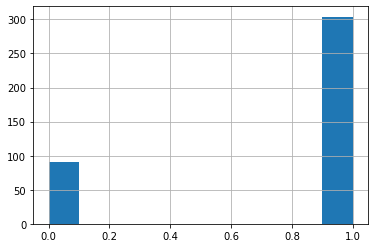

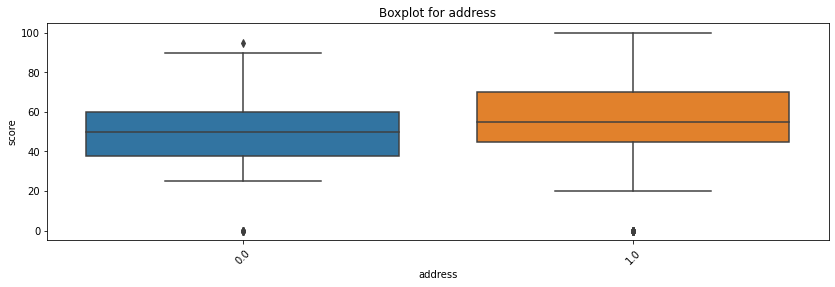

count    395.00000
mean       0.76962
std        0.42161
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: address, dtype: float64

In [209]:
# тип адреса ученика ('1' - городской, '0' - за городом)
print(df.address.describe())
df.address.hist()
get_boxplot('address')

In [ ]:
# Данные которые не влияют на оценки
get_boxplot('school')
get_boxplot('sex')
get_boxplot('reason')
get_boxplot('guardian')
get_boxplot('traveltime')
get_boxplot('nursery')
get_boxplot('internet')
get_boxplot('absences')

Изучение столбца age:Ученики в 18 лет имеют самые низкие оценки по математике. Заменили для наглядности недосточные данные о возрасте 20 и 21 года. Берем на заметку

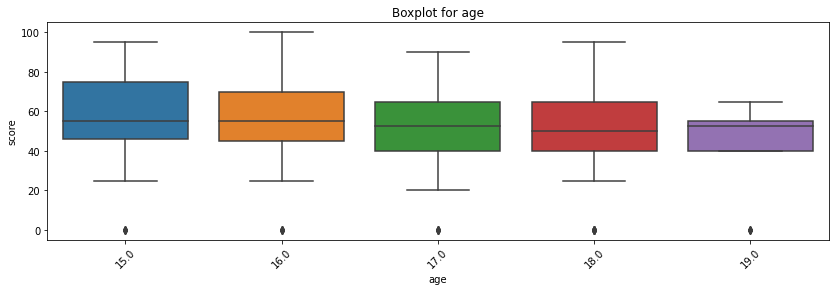

16.0    104
17.0    100
18.0     85
15.0     82
19.0     24
Name: age, dtype: int64

In [27]:
# возраст ученика (от 15 до 22)
get_boxplot('age')
df['age'].value_counts()

Изучение столбца Fedu и Medu: Чем менее образованные родители, тем ниже оценки по математике у их детей.

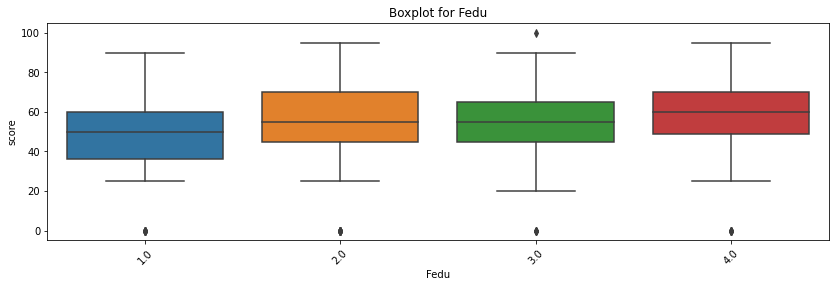

2.0    133
3.0     96
4.0     88
1.0     78
Name: Fedu, dtype: int64


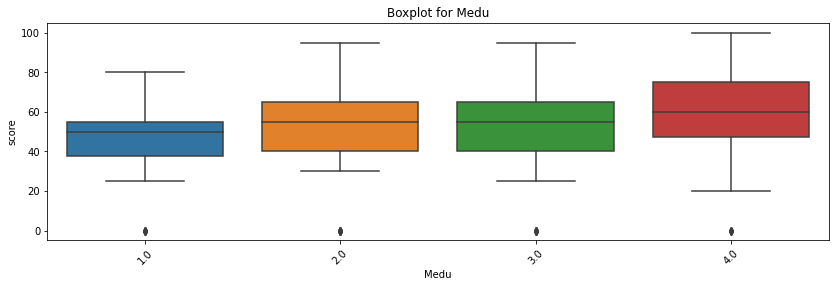

4.0    131
3.0    103
2.0    102
1.0     59
Name: Medu, dtype: int64


In [37]:
# образование матери и отца(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

get_boxplot('Fedu')
print(df.Fedu.value_counts())
get_boxplot('Medu')
print(df.Medu.value_counts())

Изучение столбца Mjob и Fjob: Медиана оценок ниже у детей, чья мать не работает. 

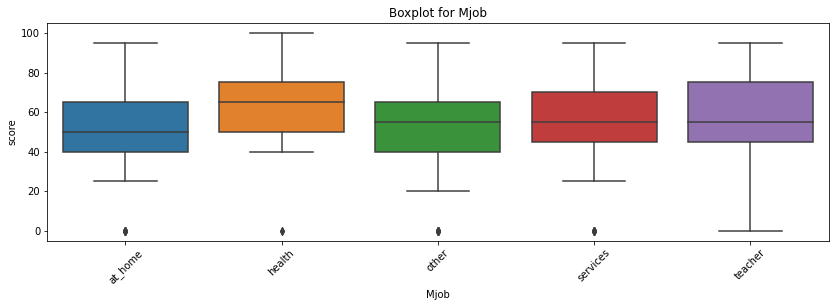

count       395
unique        5
top       other
freq        138
Name: Mjob, dtype: object
other       138
services    105
at_home      63
teacher      57
health       32
Name: Mjob, dtype: int64


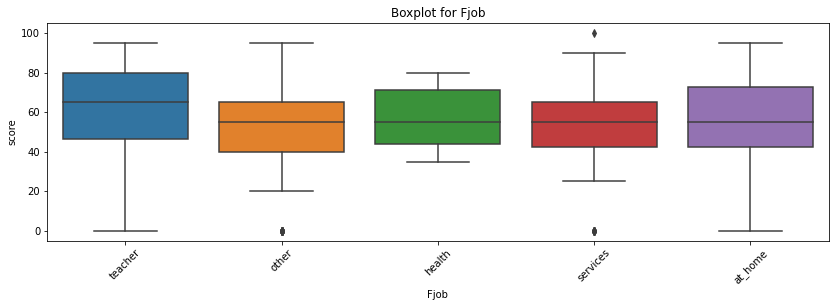

count       395
unique        5
top       other
freq        215
Name: Fjob, dtype: object
other       215
services    115
teacher      30
at_home      19
health       16
Name: Fjob, dtype: int64


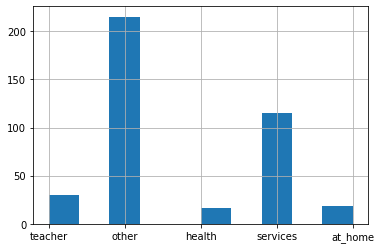

In [42]:
# работа родителей ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
get_boxplot('Mjob')
print(df.Mjob.describe())
print(df.Mjob.value_counts())
get_boxplot('Fjob')
print(df.Fjob.describe())
print(df.Fjob.value_counts())
df.Fjob.hist()

Изучение столбца studytime: Чем меньше обучения помимо школы, тем ниже оценки.

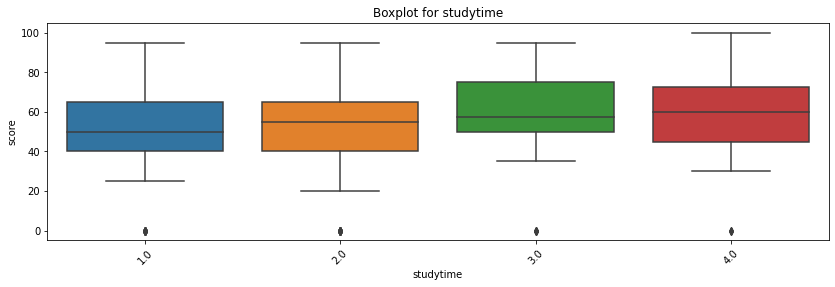

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64 2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


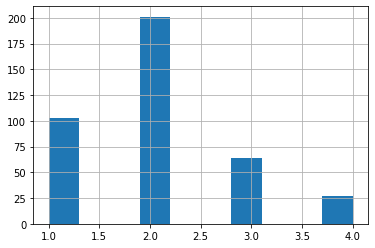

In [216]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
get_boxplot('studytime')
print(df.studytime.describe(), df.studytime.value_counts())
df.studytime.hist()

Изучение столбца failures: Внеучебные неудачи прямо влияют на оценки учеников, чем больше, тем хуже оценки

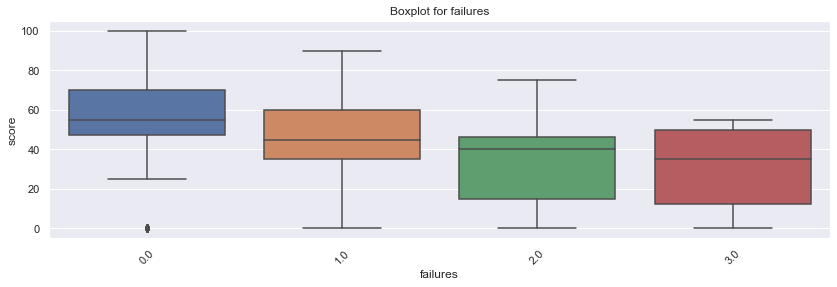

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


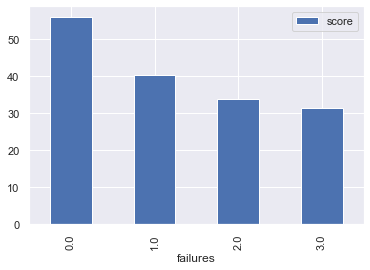

In [231]:
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
get_boxplot('failures')
print(df.failures.describe())
df.pivot_table(values='score', index=['failures']).plot(kind='bar')

Изучение столбца schoolsup:Те, кто получают дополнительную образовательную поддержку имеют более низкие оценки в среднем. Это вероятно связано с тем, что за ней обращаются отстающие ученики

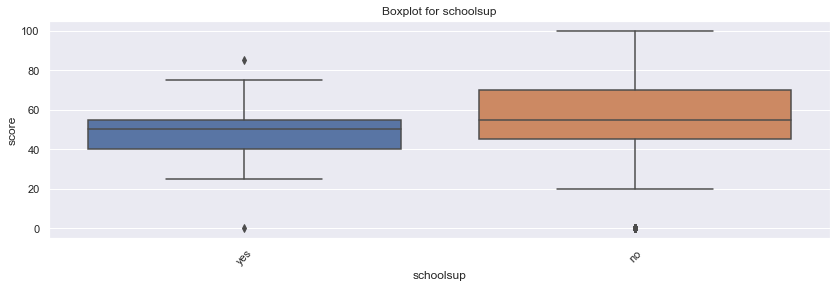

no     343
yes     52
Name: schoolsup, dtype: int64


In [233]:
# дополнительная образовательная поддержка (yes или no)

get_boxplot('schoolsup')
print(df['schoolsup'].value_counts())

Наблюдение столбца famsup: Те, кто получают дополнительную образовательную поддержку в семье имеют такие же оценки, как и те, кто не имеет

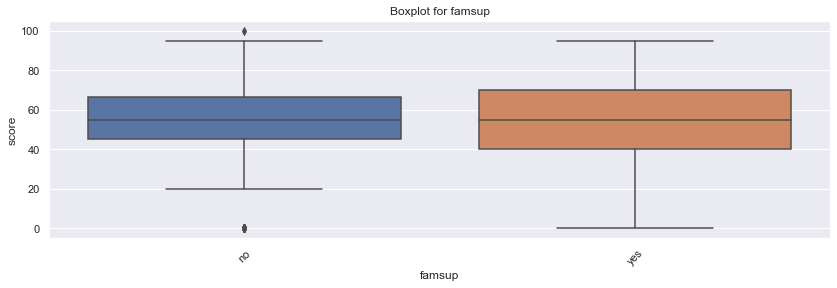

yes    243
no     152
Name: famsup, dtype: int64

In [237]:
# семейная образовательная поддержка (yes или no)
get_boxplot('famsup')
df['famsup'].value_counts()

Наблюдение столбца paid: Те, кто получает доп платные уроки по математике в медиане имеют похожие оценки, что и те, кто не получает

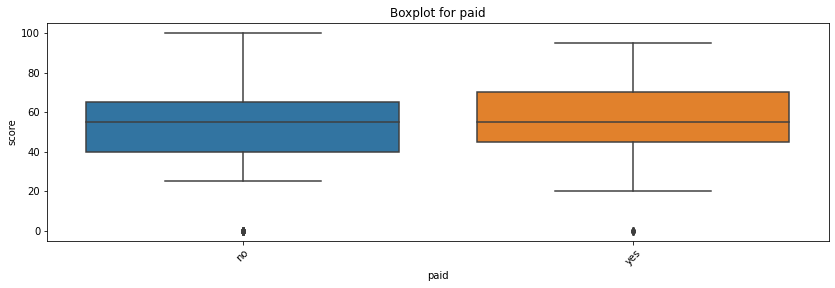

In [152]:
# дополнительные платные занятия по математике (yes или no)
get_boxplot('paid')

Наблюдение столбца activities: Те, кто получает доп внеучебные занятия в медиане имеют похожие оценки, что и те, кто не получает

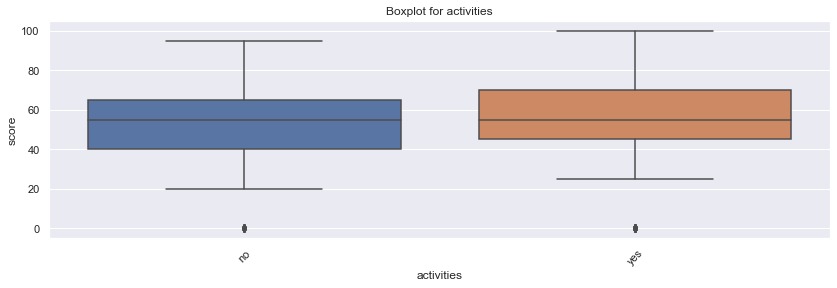

count     395
unique      2
top       yes
freq      203
Name: activities, dtype: object

In [238]:
# дополнительные внеучебные занятия (yes или no)
get_boxplot('activities')
df.activities.describe()

Наблюдение столбца higher: Те, кто не хочет получить высш. образование имеют более низкую оцнеку по математике по медиане

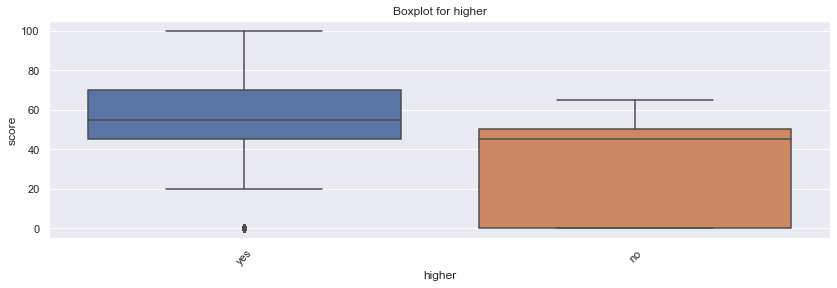

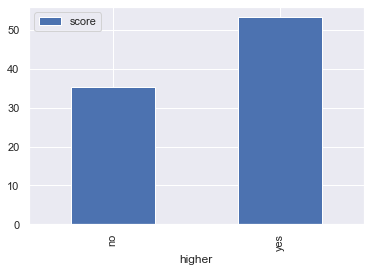

In [239]:
# хочет получить высшее образование (yes или no)
get_boxplot('higher')
df.pivot_table(values='score', index=['higher']).plot(kind='bar')

Наблюдение столбца freetime: Те, у кого нет свободного времени получают более низкие оценки. Но наблюдений таких учеников недостаточно, для точного утверждения.

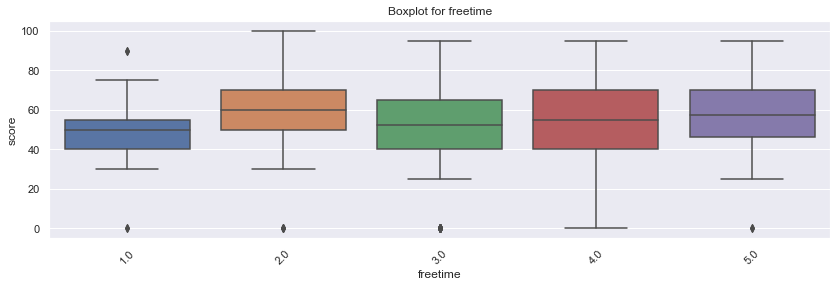

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

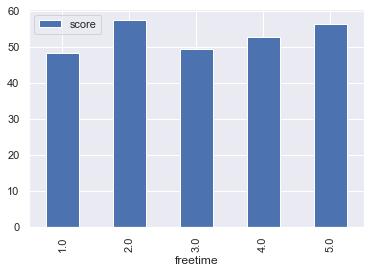

In [244]:
# свободное время после школы (от 1 - очень мало до 5 - очень мого)
get_boxplot('freetime')
df.pivot_table(values='score', index=['freetime']).plot(kind='bar')
df['freetime'].value_counts()

Наблюдение столбца goout: Те, кто немного проводит времени с друзьями, оценки немного выше, чем у тех, кто очень мало и очень много проводит врмени с ними. То есть необщительность не сильно может влиять на успеваемость.

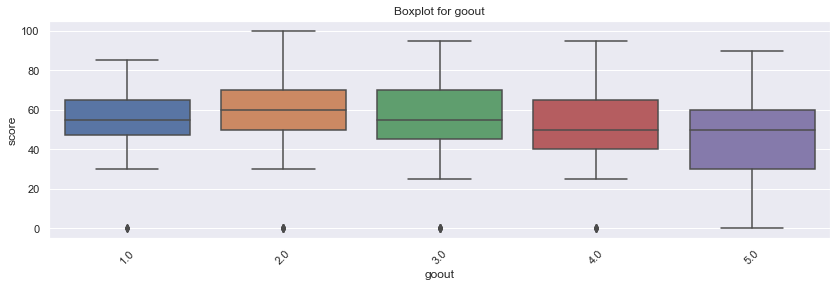

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


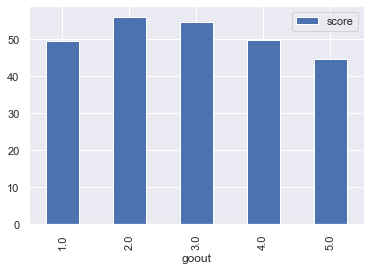

In [246]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
get_boxplot('goout')
print(df.goout.describe())
df.pivot_table(values='score', index=['goout']).plot(kind='bar')

Наблюдение столбца health: Те, кто здоровее, у того выше оценки по математике. Странно, но те, кто не болеют в данный момент получают более низкую оценку на экзамене. 

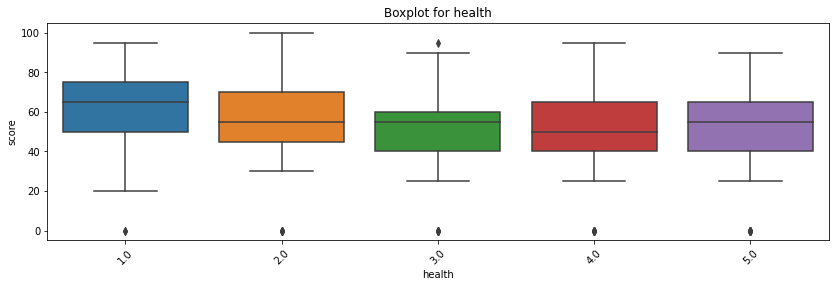

5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

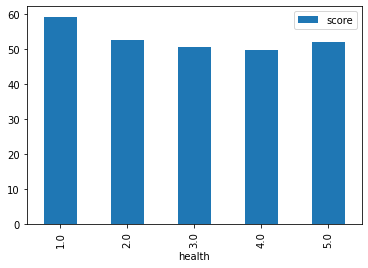

In [45]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
get_boxplot('health')
df.pivot_table(values='score', index=['health']).plot(kind='bar')
df['health'].value_counts()

Изучение корреляции числовых данных

In [247]:
df.corr()

,age,address,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.177530,-0.167336,-0.149035,0.115995,-0.003054,0.195702,0.003054,0.056179,0.019008,0.119646,-0.046443,0.119927,-0.149072
address,-0.177530,1.000000,0.139874,0.084601,-0.234474,-0.039992,-0.124107,0.039992,-0.015460,0.021508,0.040577,-0.043907,-0.035358,0.099152
Medu,-0.167336,0.139874,1.000000,0.603748,-0.112271,0.077050,-0.245110,-0.077050,-0.009605,0.026210,0.063361,-0.050991,0.062010,0.205568
Fedu,-0.149035,0.084601,0.603748,1.000000,-0.065506,0.013475,-0.267011,-0.013475,-0.031741,-0.021563,0.039256,-0.006329,-0.026672,0.128390
traveltime,0.115995,-0.234474,-0.112271,-0.065506,1.000000,-0.105795,-0.009923,0.105795,-0.008973,-0.060021,-0.025698,-0.063066,-0.053012,-0.054936
studytime,-0.003054,-0.039992,0.077050,0.013475,-0.105795,1.000000,-0.166598,-1.000000,0.043739,-0.119014,-0.051090,-0.073674,-0.074658,0.114371
failures,0.195702,-0.124107,-0.245110,-0.267011,-0.009923,-0.166598,1.000000,0.166598,-0.029921,0.094826,0.113649,0.075849,0.079299,-0.326532
"studytime, granular",0.003054,0.039992,-0.077050,-0.013475,0.105795,-1.000000,0.166598,1.000000,-0.043739,0.119014,0.051090,0.073674,0.074658,-0.114371
famrel,0.056179,-0.015460,-0.009605,-0.031741,-0.008973,0.043739,-0.029921,-0.043739,1.000000,0.168225,0.078006,0.077776,-0.090212,0.055223
freetime,0.019008,0.021508,0.026210,-0.021563,-0.060021,-0.119014,0.094826,0.119014,0.168225,1.000000,0.292305,0.060557,0.086704,0.018200


Отбираем с помощью теста Стьюдента столбцы с номинативными показателями влияющие на оценку на экзамене по математике

In [68]:
for col in ['school', 'sex', 'address', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'freetime', 'goout']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher


В итоге мы получили 5 столбцов с наблюденями, которые могут спрогнозировать проблемы на экзамене по математике.

In [69]:
df_final = df[['address', 'age', 'Mjob', 'failures', 'higher']]
df_final

,address,age,Mjob,failures,higher
0,1.0,18.0,at_home,0.0,yes
1,1.0,17.0,at_home,0.0,yes
2,1.0,15.0,at_home,3.0,yes
3,1.0,15.0,health,0.0,yes
4,1.0,16.0,other,0.0,yes
...,...,...,...,...,...
390,1.0,18.0,services,2.0,yes
391,1.0,17.0,services,0.0,yes
392,0.0,17.0,other,3.0,yes
393,0.0,18.0,services,0.0,yes


# Выводы

Итак, в результате EDA для анализа условий жизни учащихся в возрасте от 15 до 22 лет влияющих на их успеваемость по математике для построения модели выявляющей стедентов в группе риска получены следующие выводы:

- Данные имели досточно мало пропусков.
- Выбросы найдены в нескольких стоюбцах, в том числе в столбце age, Fedu, absences, traveltime.
- Изучение столбца age:Ученики в 18 лет имеют самые низкие оценки по математике. Берем на заметку
- Изучение столбца Mjob: Медиана оценок ниже у детей, чья мать не работает.
- Изучение столбца failures: Внеучебные неудачи прямо влияют на оценки учеников, чем больше, тем хуже оценки
- Наблюдение столбца higher: Те, кто не хочет получить высш. образование имеют более низкую оценку по медиане
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address, age, Mjob, failures, higher.